<a href="https://www.kaggle.com/code/venkateshkrishnan111/self-learning-data-science?scriptVersionId=154987185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

quickplaydata = pd.read_csv("/kaggle/input/overwatch-2-statistics/ow2_season_04_FINAL_heroes_stats__2023-06-27.csv")
quickplaydata.dropna(axis=1, inplace=True)


onehotencoder = LabelEncoder()

quickplaydata['Role'] = onehotencoder.fit_transform(quickplaydata['Role'])
quickplaydata['Hero'] = onehotencoder.fit_transform(quickplaydata['Hero'])
quickplaydata['Skill Tier'] = onehotencoder.fit_transform(quickplaydata['Skill Tier'])

print(quickplaydata.head())

quickplaydata.describe()

#quickplaydata.drop(['Role', 'Skill Tier', 'Hero'], axis=1, inplace=True)

# sns.pairplot(quickplaydata)
# plt.show()

# corr_matrix = quickplaydata.corr()

# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

X = quickplaydata.drop(['Damage / 10min'], axis = 1)

#X = quickplaydata[['Eliminations / 10min','Objective Kills / 10min' ]] #.drop(['Damage / 10min', 'KDA Ratio','Pick Rate, %',  ], axis = 1)
Y = quickplaydata['Damage / 10min']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)

# model1 = AdaBoostRegressor(random_state=0, n_estimators=100)
# model2 = RandomForestRegressor(random_state=0)
# model3 = GradientBoostingRegressor(random_state=0)
# model = VotingRegressor([('lr', model1), ('rf', model2), ('r3', model3)])

# estimators = [
#      ('lr', RidgeCV()),
#      ('svr', LinearSVR(dual=True, random_state=42))
# ]

# model = StackingRegressor(
# estimators=estimators,
# final_estimator=RandomForestRegressor(n_estimators=10,
#                                          random_state=42))

# param_grid = {'loss' :['squared_error', 'absolute_error', 'huber', 'quantile'], 'learning_rate' : [0.001,0.01,0.1, 0.5, 1, 1.5, 2, 5, 10] , 'n_estimators': [100, 250, 500, 750, 1000], 'criterion' : ['friedman_mse', 'squared_error'],'max_features' : ['log2']}

param_grid = {'loss' :['squared_error', 'quantile'], 'learning_rate' : [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2] , 'n_estimators': [100, 250, 500], 'criterion' : ['friedman_mse', 'squared_error'],'max_features' : ['log2']}

model = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=param_grid)

# model = AdaBoostRegressor(random_state=0, n_estimators=100)
# model = RandomForestRegressor(random_state=0)
# model = GradientBoostingRegressor(random_state=0)
# model = linear_model.Lasso(max_iter=10000, selection='random', tol=1e-5)

model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(predictions)


best_model = model.best_estimator_
y_pred = best_model.predict(X_test)
print(model.best_params_)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE Error", mae)
print("MSE Error", mse)
print("RMSE Error", rmse)
print("R2 Error", r2)
new_dataset = pd.DataFrame({ 'Damage': quickplaydata.tail(60)['Damage / 10min'],
              'DamagePred': y_pred })
print(new_dataset)



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reviews/Restaurant_Reviews.tsv
/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv
/kaggle/input/overwatch-2-statistics/ow2_quickplay_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_04_FINAL_heroes_stats__2023-06-27.csv
/kaggle/input/overwatch-2-statistics/ow2_season_02_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_03_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_01_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv
   Hero  Skill Tier  KDA Ratio  Pick Rate, %  Win Rate, %  \
0     0           0       4.23          9.57        49.30   
1     0           1       3.93          3.74        44.70   
2     0           7       4.14          4.52        47.07   
3     0           3       4.21          6.51        48.72   
4     0           6       4.31          9.68        48.97   

   Eliminations / 10min  Object

# Classification

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


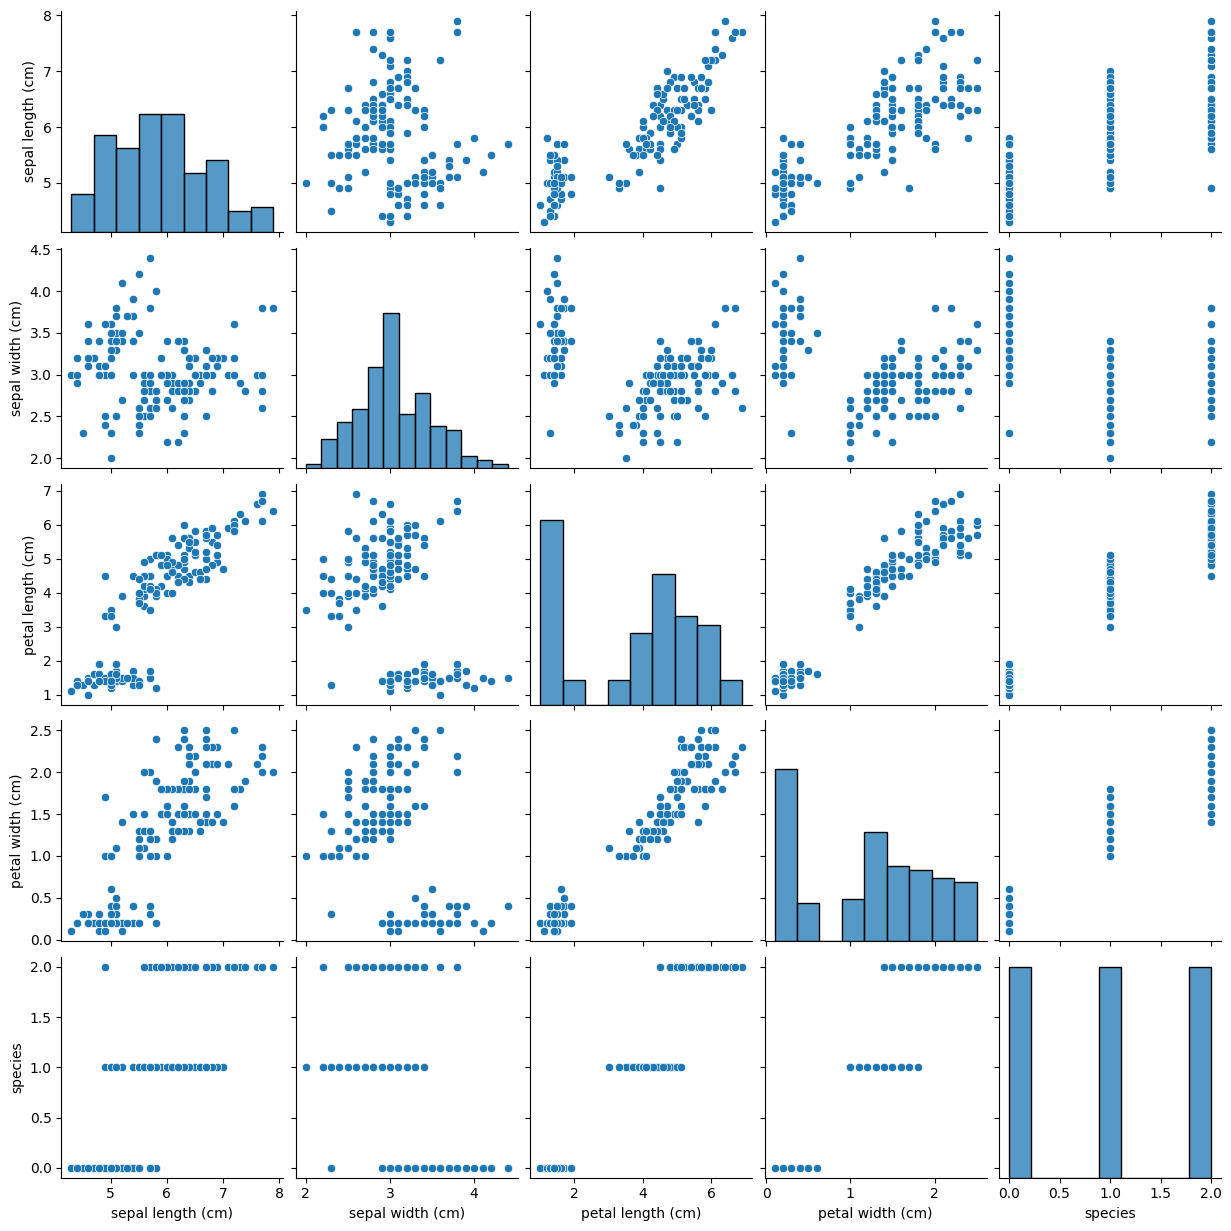

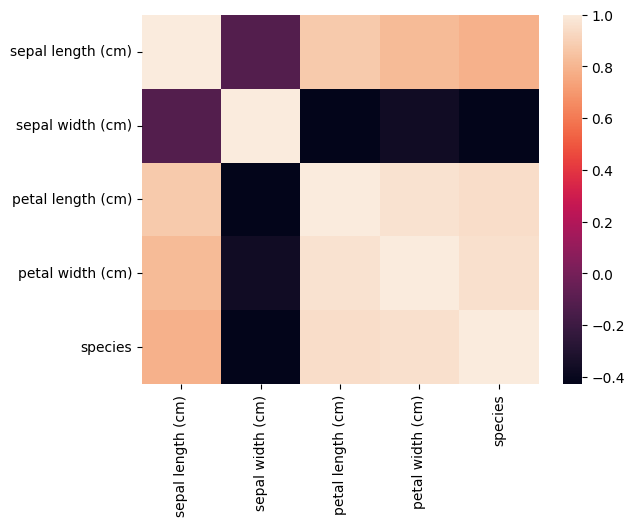

{'max_iter_predict': 50, 'n_restarts_optimizer': 0}


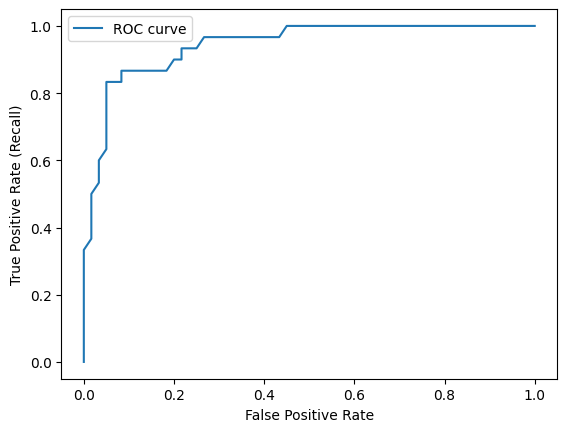

Accuracy: 0.8666666666666667
Precision: 0.8848484848484849
Recall: 0.8666666666666667
F1 Score: 0.8696296296296296
ROC AUC: 0.9457497911445281


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

iris = load_iris()
encoder = LabelEncoder()


iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df['species'] = encoder.fit_transform(iris_df['species'])
print(iris_df.head())
sns.pairplot(iris_df)
plt.show()

sns.heatmap(iris_df.corr())
plt.show()

X = iris_df.drop(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species'], axis=1)
Y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#model = AdaBoostClassifier(n_estimators=100, random_state=42)
#model = RandomForestClassifier(max_depth=2, random_state=0)
#model = HistGradientBoostingClassifier()
#model = GaussianProcessClassifier()
kernel = 1.0 * RBF(1.0)
classifier = GaussianProcessClassifier(kernel=kernel)

param_grid = {
    'n_restarts_optimizer': [0, 1, 2, 3, 4, 5],
    'max_iter_predict': [50, 100, 200, 250, 500, 1000]
}

model = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print(predictions)

best_model = model.best_estimator_
y_pred = best_model.predict(X_test)
print(model.best_params_)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

y_pred_prob = model.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=model.classes_)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='weighted')


fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Natural Language Processing

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.scripts.glove2word2vec import glove2word2vec
import fasttext.util

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

review_restaurant = pd.read_csv('/kaggle/input/reviews/Restaurant_Reviews.tsv', sep='\t')
print(review_restaurant.head())

X = review_restaurant['Review']
Y = review_restaurant['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# model = AdaBoostClassifier(n_estimators=100, random_state=42)
# model = RandomForestClassifier(max_depth=2, random_state=0)
# model = HistGradientBoostingClassifier()
# model = GaussianProcessClassifier()
# kernel = 1.0 * RBF(1.0)
# model = GaussianProcessClassifier(kernel=kernel)

# param_grid = {
#     'n_restarts_optimizer': [0, 1, 2, 3, 4, 5],
#     'max_iter_predict': [50, 100, 200, 250, 500, 1000]
# }

# model = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Create the Gaussian Process Classifier
classifier = GaussianProcessClassifier(kernel=RBF())

# Wrap the classifier with OneVsRestClassifier or OneVsOneClassifier
classifier = OneVsRestClassifier(classifier)  # or OneVsOneClassifier

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'estimator__n_restarts_optimizer': [0, 1, 2, 3, 4, 5],
    'estimator__max_iter_predict': [50, 100, 200, 500, 1000, 2500]
}

# Create GridSearchCV object
model = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print("MAE Error", mae)
print("MSE Error", mse)
print("RMSE Error", rmse)
print("R2 Error", r2score)

/kaggle/input/reviews/Restaurant_Reviews.tsv
/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv
/kaggle/input/overwatch-2-statistics/ow2_quickplay_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_04_FINAL_heroes_stats__2023-06-27.csv
/kaggle/input/overwatch-2-statistics/ow2_season_02_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_03_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_01_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
MAE Error 0.28
MSE Error 0.28
RMSE Err

# NLP - Deep Learning

In [4]:
!pip install transformers

import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

review_restaurant = pd.read_csv('/kaggle/input/reviews/Restaurant_Reviews.tsv', sep='\t')

train_data, test_data, train_labels, test_labels = train_test_split(
    review_restaurant['Review'],
    review_restaurant['Liked'],
    test_size=0.2,
    random_state=42
)

class RestaurantReviewDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_length):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.reviews.iloc[idx]
        label = self.labels.iloc[idx]

        encoding = self.tokenizer(
            review,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "label": torch.tensor(label, dtype=torch.long),
        }

    
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

max_length = 64
train_dataset = RestaurantReviewDataset(train_data, train_labels, tokenizer, max_length)
test_dataset = RestaurantReviewDataset(test_data, test_labels, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-5)

num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_predictions)
mae = mean_absolute_error(all_labels, all_predictions)
mse = mean_squared_error(all_labels, all_predictions)
rmse = np.sqrt(mse)
r2score = r2_score(all_labels, all_predictions)

print(f"Accuracy: {accuracy}")
print("MAE Error", mae)
print("MSE Error", mse)
print("RMSE Error", rmse)
print("R2 Error", r2score)

new_dataset = pd.DataFrame({"Reviews":review_restaurant['Review'][:200],
                             "Liked_dataset": review_restaurant['Liked'][:200],
                           "Liked" : all_predictions})
print(new_dataset.head(25))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 0.93
MAE Error 0.07
MSE Error 0.07
RMSE Error 0.2645751311064591
R2 Error 0.719551282051282
                                              Reviews  Liked_dataset  Liked
0                            Wow... Loved this place.              1      0
1                                  Crust is not good.              0      1
2           Not tasty and the texture was just nasty.              0      1
3   Stopped by during the late May bank holiday of...              1      1
4   The selection on the menu was great and so wer...              1      1
5      Now I am getting angry and I want my damn pho.              0      1
6               Honeslty it didn't taste THAT fresh.)              0      0
7   The potatoes were like rubber and you could te...              0      1
8                           The fries were great too.              1      0
9                                      A great touch.              1      1
10                           Service was very prompt.         

# Clustering

/kaggle/input/reviews/Restaurant_Reviews.tsv
/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv
/kaggle/input/overwatch-2-statistics/ow2_quickplay_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_04_FINAL_heroes_stats__2023-06-27.csv
/kaggle/input/overwatch-2-statistics/ow2_season_02_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_03_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/overwatch-2-statistics/ow2_season_01_FINAL_heroes_stats__2023-05-06.csv
/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity'

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2848589191898987
Silhouette Score 2: 0.2774439826952265
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
{0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}


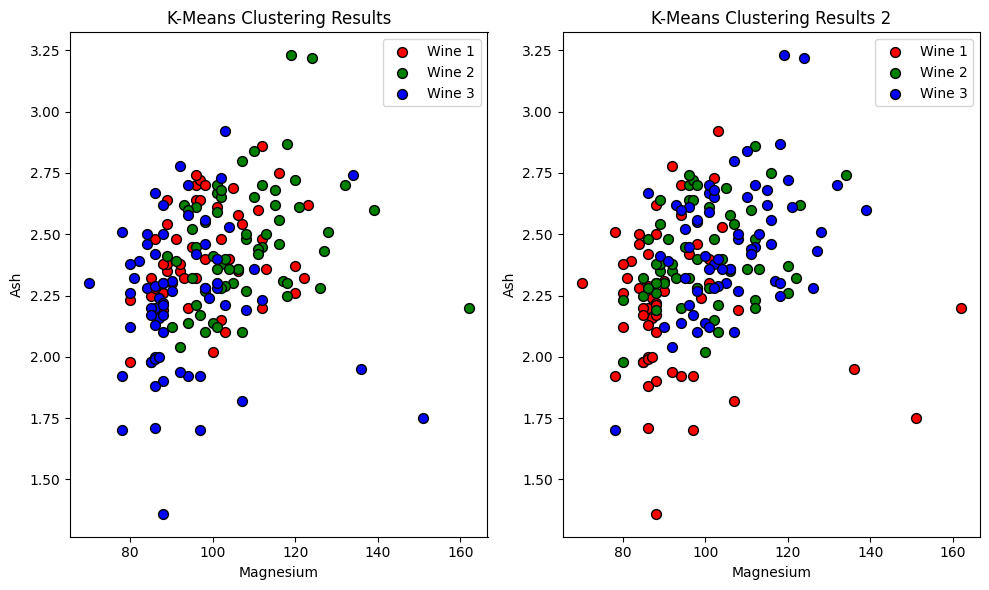

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
wine_data = pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")
print(wine_data.columns)

selected_features = wine_data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
n_clusters = 3

# power_transformer = PowerTransformer(method='box-cox')  # 'yeo-johnson' is an alternative method
# X_power_transformed = power_transformer.fit_transform(selected_features)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(scaled_features)

# gmm = GaussianMixture(n_components=3, random_state=42)
# wine_data['Cluster_StandardScaler'] = gmm.fit_predict(scaled_features)

birch = Birch(n_clusters=3)
wine_data['Cluster_StandardScaler'] = birch.fit_predict(scaled_features)

# agglomerative = AgglomerativeClustering(n_clusters=3)
# wine_data['Cluster_StandardScaler'] = agglomerative.fit_predict(scaled_features)

# kmeans2 = KMeans(n_clusters=n_clusters, random_state=42)
# wine_data['Cluster_StandardScaler'] = kmeans.fit_predict(scaled_features)

print(wine_data.columns)

silhouette_avg = silhouette_score(scaled_features, wine_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

silhouette_avg = silhouette_score(scaled_features, wine_data['Cluster_StandardScaler'])
print(f"Silhouette Score 2: {silhouette_avg}")

unique_values = wine_data['Cluster'].unique()

mapping_dict = {value: f'Wine {value + 1}' for value in unique_values}
cluster_labels = {0: 'Wine 1', 1: 'Wine 2', 2: 'Wine 3'}
wine_data['Wine_Label'] = wine_data['Cluster'].map(mapping_dict)
wine_data['Wine_Label_StandardScaler'] = wine_data['Cluster_StandardScaler'].map(mapping_dict)
plt.figure(figsize=(10, 6))

feature1 = 'Magnesium'
feature2 = 'Ash'
feature3 = 'Alcohol'

feature12 = 'Magnesium'
feature22 = 'Ash'
feature32 = 'Alcohol'

for label, color in zip(cluster_labels.values(), ['red', 'green', 'blue']):
    print(cluster_labels)
    plt.subplot(1, 2, 1)
    cluster_data = wine_data[wine_data['Wine_Label'] == label]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=label, color=color, edgecolors='k', s=50)

plt.title('K-Means Clustering Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

for label, color in zip(cluster_labels.values(), ['red', 'green', 'blue']):
    print(cluster_labels)
    plt.subplot(1, 2, 2)
    cluster_data = wine_data[wine_data['Wine_Label_StandardScaler'] == label]
    plt.scatter(cluster_data[feature12], cluster_data[feature22], label=label, color=color, edgecolors='k', s=50)

plt.title('K-Means Clustering Results 2')
plt.xlabel(feature12)
plt.ylabel(feature22)
plt.legend()

plt.tight_layout()
plt.show()

# Time Series Analysis

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00


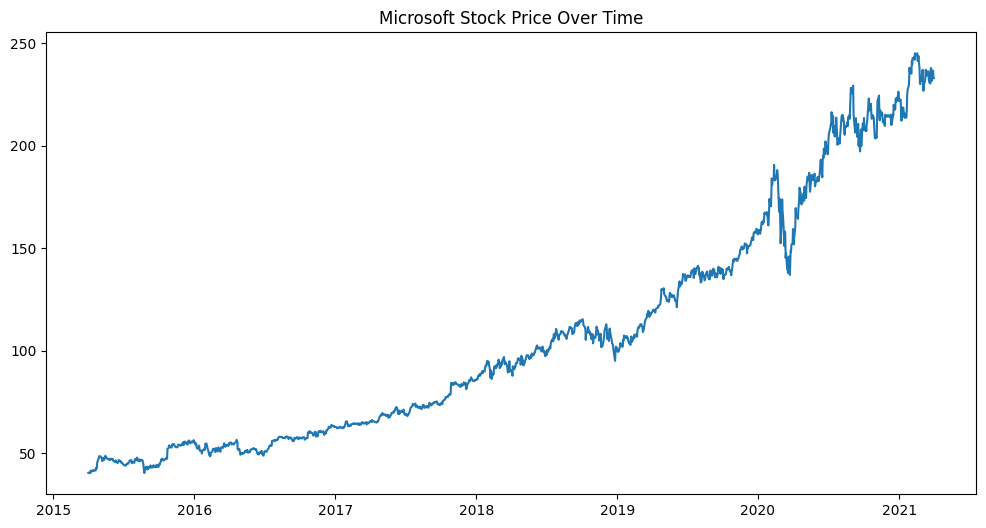

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-06 16:00:00', '2015-04-07 16:00:00',
               '2015-04-08 16:00:00', '2015-04-09 16:00:00',
               '2015-04-10 16:00:00', '2015-04-13 16:00:00',
               '2015-04-14 16:00:00', '2015-04-15 16:00:00',
               ...
               '2021-03-18 16:00:00', '2021-03-19 16:00:00',
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3283.779
Date:                Thu, 14 Dec 2023   AIC               

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

Predicted Values  1511    232.819860
1512    233.506580
1513    233.808012
1514    233.348783
1515    232.950795
           ...    
3017    233.332621
3018    233.332621
3019    233.332621
3020    233.332621
3021    233.332621
Name: predicted_mean, Length: 1511, dtype: float64


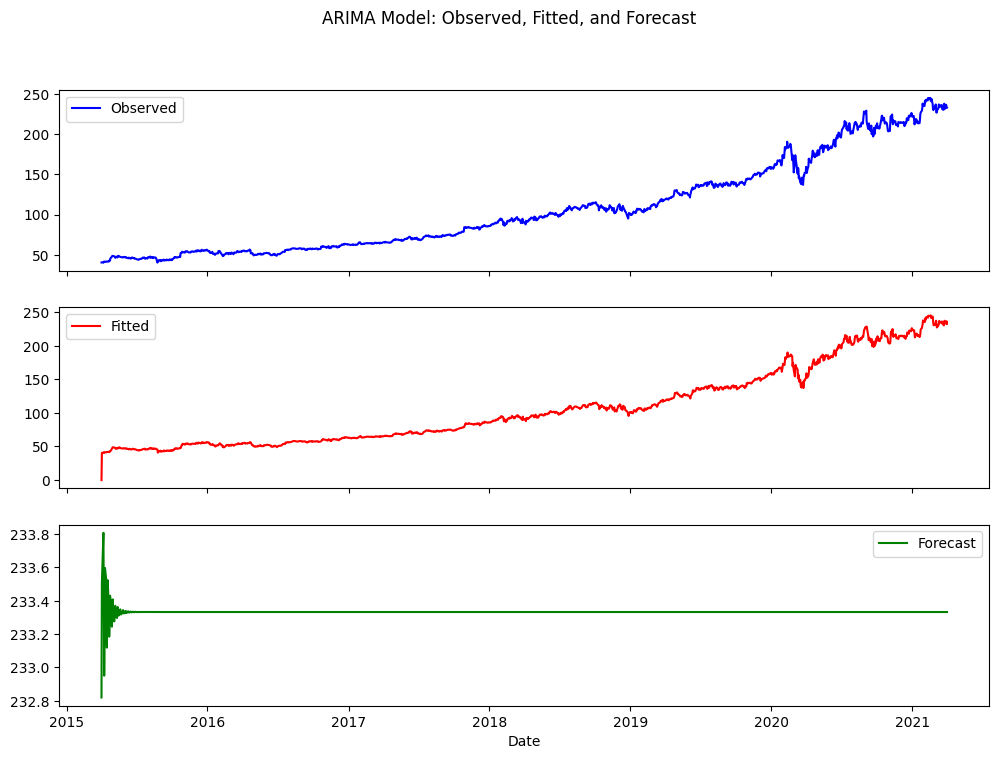

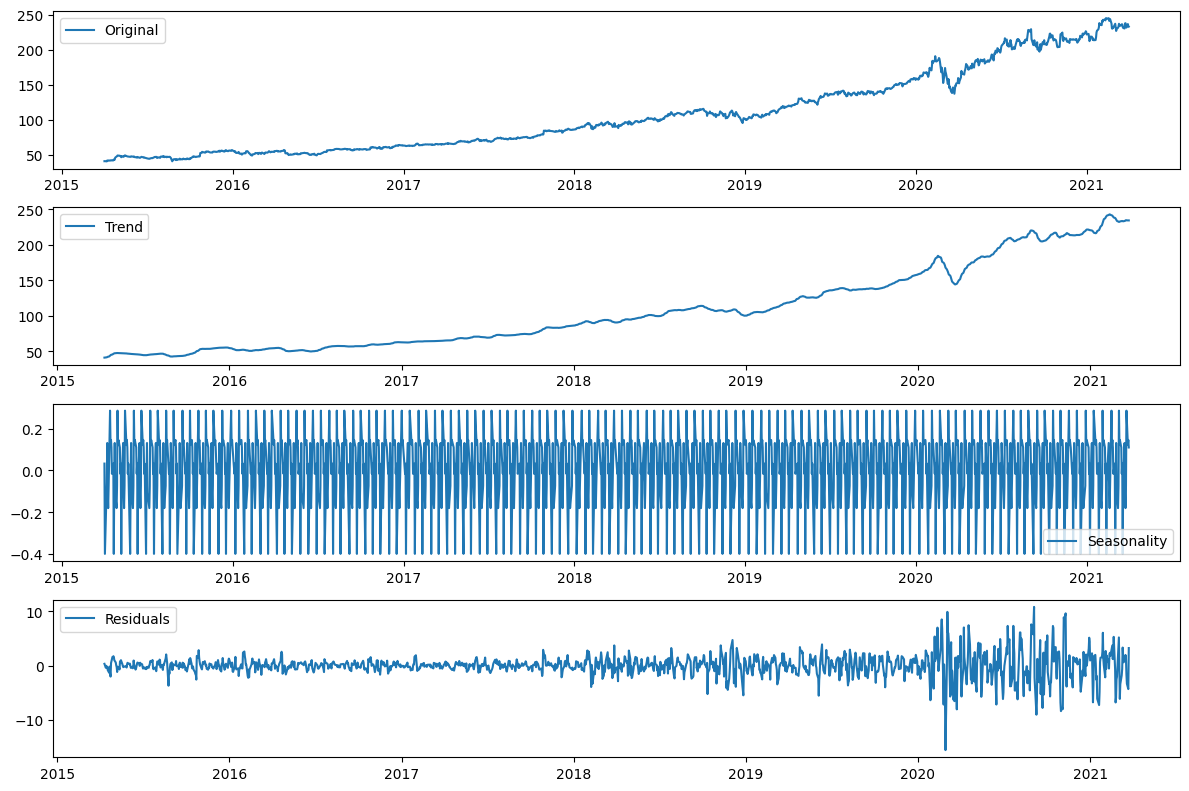

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
! pip install pmdarima
from pmdarima import auto_arima

# Step 1: Load the data
# Assuming 'Date' is the index and 'Close' is the closing stock price
data = pd.read_csv("/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 2: Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Open'])
plt.title('Microsoft Stock Price Over Time')
plt.show()

print(data.index)

data_diff = data['Open'] #data['Open'].diff().dropna()

# # Define the range of values for p, d, q
# p = d = q = range(0, 3)

# # Generate all possible combinations of p, d, q
# pdq = list(itertools.product(p, d, q))

# # Conduct grid search
# best_aic = float('inf')
# best_params = None

# for param in pdq:
#     try:
#         model = ARIMA(data_diff, order=param)
#         results = model.fit()
#         aic = results.aic
#         if aic < best_aic:
#             best_aic = aic
#             best_params = param
#     except:
#         continue

# print(f"Best AIC: {best_aic}")
# print(f"Best Parameters: {best_params}")

model = auto_arima(data_diff, seasonal=True, m=12, suppress_warnings=True)
print(model.summary())

# Step 3: Check for stationarity (Augmented Dickey-Fuller Test)
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

adf_test(data_diff)

data['Open'] = np.log1p(data['Open'])

result = seasonal_decompose(data_diff, model='additive', period=12)

model = ARIMA(data_diff, order=(2, 1, 2))
fit_model = model.fit()

# stl = STL(data_diff, seasonal=13)  # The seasonal parameter can be adjusted based on your data
# fit_model = stl.fit()

# Step 7: Forecast future values
forecast_steps = 1511  # Number of steps to forecast into the future
forecast = fit_model.get_forecast(steps=forecast_steps)

print("Predicted Values ",forecast.predicted_mean)

# Step 8: Plot results with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot observed values
ax1.plot(data.index, data_diff, label='Observed', color='blue')
ax1.legend()

# Plot fitted values
ax2.plot(data.index, fit_model.fittedvalues, label='Fitted', color='red')
ax2.legend()

# Plot forecasted values
ax3.plot(data.index, forecast.predicted_mean, label='Forecast', color='green')
ax3.legend()

# Set common title and x-axis label
plt.suptitle('ARIMA Model: Observed, Fitted, and Forecast')
plt.xlabel('Date')

# Display the plot
plt.show()

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data_diff, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()



In [7]:
import requests
from bs4 import BeautifulSoup

# Specify the URL to scrape
url = 'https://www.bbc.com/news'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract information from the page
    headlines = soup.find_all('h3', class_='gs-c-promo-heading__title')
    authors = soup.find_all('span', class_='gs-c-byline__name')

    # Print the headlines and authors
    for i, (headline, author) in enumerate(zip(headlines, authors), 1):
        print(f'Headline {i}: {headline.text.strip()}')
        print(f'Author {i}: {author.text.strip()}')
        print('---')
else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')
